<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/1_layer_classiication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

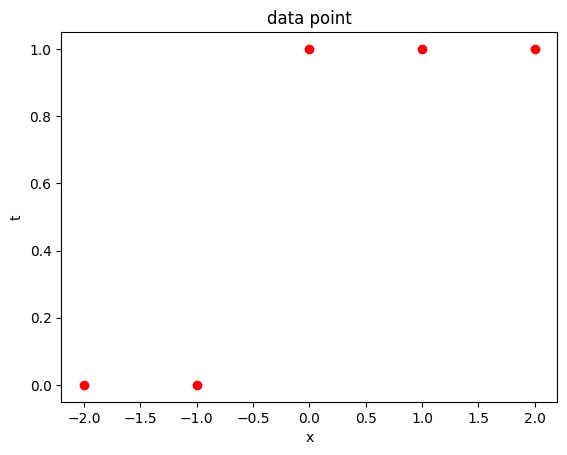

Epoch=0: Cost=0.1204, w=0.0300, b=0.0050
Epoch=100: Cost=0.0321, w=1.1584, b=0.3204
Epoch=200: Cost=0.0228, w=1.5362, b=0.5195
Epoch=300: Cost=0.0184, w=1.7937, b=0.6708
Epoch=400: Cost=0.0155, w=1.9994, b=0.7929
Epoch=500: Cost=0.0134, w=2.1745, b=0.8953
Epoch=600: Cost=0.0119, w=2.3285, b=0.9836
Epoch=700: Cost=0.0106, w=2.4665, b=1.0614
Epoch=800: Cost=0.0096, w=2.5917, b=1.1309
Epoch=900: Cost=0.0087, w=2.7065, b=1.1937
Epoch=1000: Cost=0.0080, w=2.8124, b=1.2512
Epoch=1100: Cost=0.0074, w=2.9106, b=1.3040
Epoch=1200: Cost=0.0068, w=3.0022, b=1.3530
Epoch=1300: Cost=0.0064, w=3.0880, b=1.3985
Epoch=1400: Cost=0.0060, w=3.1686, b=1.4412
Epoch=1500: Cost=0.0056, w=3.2446, b=1.4812
Epoch=1600: Cost=0.0053, w=3.3164, b=1.5189
Epoch=1700: Cost=0.0050, w=3.3845, b=1.5546
Epoch=1800: Cost=0.0047, w=3.4492, b=1.5883
Epoch=1900: Cost=0.0045, w=3.5108, b=1.6205

최종 결과:
w = 3.5690
b = 1.6507


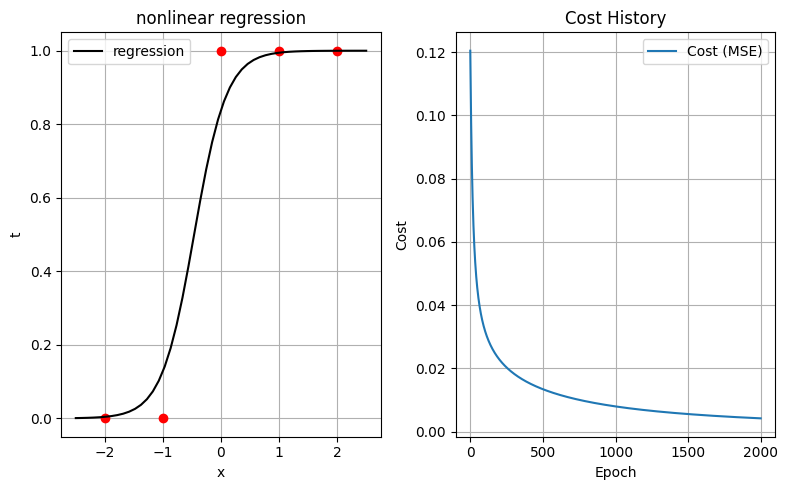

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  7 18:30:30 2025

@author: kcshi
"""

import numpy as np
import matplotlib.pyplot as plt

N = 5
x = np.array([-2,-1,0,1,2])
t = np.array([0,0,1,1,1]) #targets

plt.plot(x,t,'ro')
plt.xlabel('x')
plt.ylabel('t')
plt.title("data point")

plt.show()

phi = lambda u: 1/(1+np.exp(-u))
#dphi = lambda u:np.exp(-u)/(1+np.exp(-u))**2
dphi = lambda u:phi(u)*(1-phi(u))

# 2. 초기 파라미터 설정
w = 0.0  # 기울기
b = 0.0  # 절편

def compute_cost(x, t, w, b):
    # x: 입력변수
    # y: 출력변수
    # w: 웨이트
    # b: 바이어스
    u = w * x + b
    cost   = 1/2*np.mean((phi(u) -t)**2)
    return cost

# 하이퍼파라미터
learning_rate = 0.1
epochs = 2000
n = len(x)  # 데이터 개수

# 4. 경사하강법 학습 루프
cost_history = []

for i in range(epochs):
    u = w * x + b
    t_pred = phi(u)
    error = t_pred - t
    dphi_u = dphi(u)
    # 기울기 계산
    dw = (2 / n) * np.sum(error*dphi_u*x)
    db = (2 / n) * np.sum(error*dphi_u)

    # 기울기 계산
    #dw = (2 / n) * np.sum(error*t_pred*(1-t_pred)*x)
    #db = (2 / n) * np.sum(error*t_pred*(1-t_pred))


    # 파라미터 업데이트
    w -=  learning_rate * dw
    b -=  learning_rate * db

    # 비용 기록
    cost = compute_cost(x, t, w, b)
    cost_history.append(cost)

    # 중간 출력
    if i % 100 == 0:
        print(f"Epoch={i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

# 5. 최종 결과 출력
print("\n최종 결과:")
print(f"w = {w:.4f}")
print(f"b = {b:.4f}")


# 6. 회귀선 시각화
xx = np.linspace(-2.5,2.5)
t_fit = phi(w * xx + b)
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(x, t, 'ro')
plt.plot(xx, t_fit, 'k', label='regression')
plt.xlabel('x')
plt.ylabel('t')
plt.title('nonlinear regression')
plt.legend()
plt.grid(True)

# 7. 비용 함수 감소 시각화
plt.subplot(1, 2, 2)
plt.plot(cost_history, label='Cost (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




In [6]:
# 분류함수로 분류하기
def classifier(x):
    t_predict = phi(w*x + b)
    predict = t_predict > 0.5 # array of True or False
    return np.int16(predict)
print("\n")
xx = np.array([1,2,-2,3,4,-10,11]) #임의의 테스트 데이터
print("data = ", xx)
print("class = ", classifier(xx))




data =  [  1   2  -2   3   4 -10  11]
class =  [1 1 0 1 1 0 1]
